<a href="https://colab.research.google.com/github/Alexxakiode/Introduction-to-Machine-Learning/blob/main/Bank_Loan_Approval_Prediction_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PREPARING THE DATA LOADING PROCEDURE

Establishing conditions to ensure clear and smooth code run

In [ ]:
!pip install shutup


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shutup;shutup.please()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import preprocessing

LOADING THE DATA

In [ ]:
!gdown <"bank-full.csv">

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `gdown <"bank-full.csv">'


In [ ]:
#To store away the file on a cloud drive such as Google drive
!pip install --upgrade --q --no-cache-dir gdown

In [ ]:
#Storing the dataset exactly in the main folder as this file on cloud drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset for exploration
bank_details = pd.read_csv("/content/drive/MyDrive/ML Assignment/bank-full.csv")

In [ ]:
# Displaying the first 5 lines of the dataset
bank_details.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Displaying the last 5 lines of the dataset
bank_details.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
bank_details = bank_details.drop(["contact", "campaign", "pdays", "previous", "day", "month"], axis=1)


In [ ]:
bank_details

,age,job,marital,education,default,balance,housing,loan,duration,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,261,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,unknown,no


In [ ]:
bank_details = bank_details.query('education != "unknown"')
bank_details

,age,job,marital,education,default,balance,housing,loan,duration,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,261,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,unknown,no
5,35,management,married,tertiary,no,231,yes,no,139,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,217,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,unknown,no


In [ ]:
# #Converting categorical features to numerical features for regression
# bank_details['default'] = bank_details['default'].map({'no':0, 'yes':1})
# bank_details['housing'] = bank_details['housing'].map({'no':0, 'yes':1})
# bank_details['loan'] = bank_details['loan'].map({'no':0, 'yes':1})
bank_details['Target'] = bank_details['Target'].map({'no':0, 'yes':1})


In [ ]:
y = bank_details['Target']
y

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 43354, dtype: int64

EXPERIMENT 1

Problem 1A: To predict customer's default status - Linear or Logistic Regression

Problem 1B: To predict customer's default status - Logistic Regression

Problem 1C: To predict if customers bank account balance, housing status, default status, existing loan and duration of loan will determine ability to get loan or not– Multiple Regression


LOGISTIC REGRESSION

In [ ]:
#bank_details = bank_details.iloc[:,0:16]
X = pd.get_dummies(bank_details)
#bank_details

In [ ]:
X 

,age,balance,duration,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
1,44,29,151,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,33,2,76,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
5,35,231,139,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
6,28,447,217,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
45207,71,1729,456,1,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
45208,72,5715,1127,1,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
45209,57,668,508,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [ ]:
X

,age,balance,duration,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
1,44,29,151,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,33,2,76,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
5,35,231,139,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
6,28,447,217,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,1,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
45207,71,1729,456,1,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
45208,72,5715,1127,1,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0
45209,57,668,508,0,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [ ]:
y

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: Target, Length: 43354, dtype: int64

LOGISTIC REGRESSION RELATIONSHIP CHECK USING DATA VISUALISATION MATRIXES

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
scaler = StandardScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
log_model = LogisticRegression()
log_model

LogisticRegression()

In [ ]:
#Model fitting and scoring
log_model.fit(scaled_X_train, y_train)
log_model.score(scaled_X_test, y_test)


1.0

In [ ]:
log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

In [ ]:
score = log_model.score(X_test,y_test)
score

1.0

In [ ]:
print('Intercept: \n', log_model.intercept_)
print('Coefficients: \n', log_model.coef_)

Intercept: 
 [-1.25932327]
Coefficients: 
 [[-4.70061844e-02 -4.27031170e-06  1.36911750e-03  1.29135593e+01
   1.58250297e-01 -6.83320037e-01 -1.67597985e-01 -1.52443185e-01
  -4.57582320e-01  5.08926165e-01 -8.94483288e-02 -3.18636856e-01
   1.26141578e-01 -1.47337550e-01 -6.71258791e-04 -2.65387222e-02
  -6.15708027e-02 -8.93964900e-01 -2.94722500e-01 -5.47666033e-01
  -7.58726089e-02 -6.26719561e-01 -1.06553179e+00 -1.84726408e-01
  -1.29059563e-01 -1.12119864e+00 -2.53561013e-01 -9.96697190e-01
  -5.17602534e-01 -1.15506460e-01  1.46102147e+00 -2.07817068e+00]]


In [ ]:
pred = log_model.predict(X_test)

In [ ]:
log_model.predict(X)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9754930227194095

In [ ]:

confusion_matrix(y_test,y_pred)

array([[14894,   425],
       [    0,  2023]])

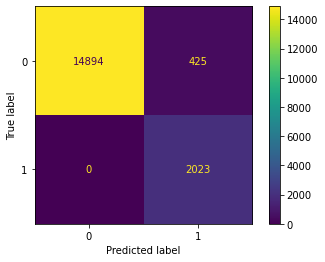

In [ ]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [ ]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

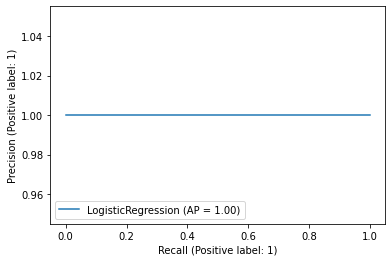

In [ ]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

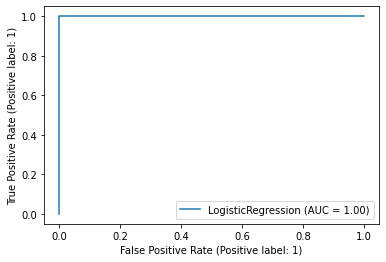

In [ ]:
plot_roc_curve(log_model,scaled_X_test,y_test)

OBSERVING THE CLASSIFICATION REPORTS:

Precision

Recall

F1-Score

ROC Curve

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15319
           1       0.83      1.00      0.90      2023

    accuracy                           0.98     17342
   macro avg       0.91      0.99      0.95     17342
weighted avg       0.98      0.98      0.98     17342

